<a href="https://colab.research.google.com/github/GNunes-br/nlp_sentiment_analysis_pt1/blob/main/Machine_Learning_para_classificar_textos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
driveSource = '/content/drive/MyDrive/Colab Notebooks/datasets'

# Dados textuais, classificação e exploração

In [3]:
dataset = pd.read_csv(driveSource + "/imdb_pt_br.csv")

In [4]:
dataset

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg
...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos


In [5]:
dataset.sentiment.unique()

array(['neg', 'pos'], dtype=object)

In [6]:
dataset.sentiment.value_counts()

neg    24765
pos    24694
Name: sentiment, dtype: int64

In [7]:
classification = dataset.sentiment.replace(['neg', 'pos'], [0,1])
dataset["classif"] = classification

In [8]:
dataset.head()

,id,text_en,text_pt,sentiment,classif
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [9]:
dataset.tail()

,id,text_en,text_pt,sentiment,classif
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1
49458,49460,Working-class romantic drama from director Mar...,O drama romântico da classe trabalhadora do di...,pos,1


# Bag of Words: criando representações da linguagem humana.

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
texts = ["Assisti um filme ótimo", "Assisti um filme ruim"]

In [12]:
vectorizer = CountVectorizer(lowercase=False)
bagOfWords = vectorizer.fit_transform(texts)

In [13]:
vectorizer.get_feature_names()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['Assisti', 'filme', 'ruim', 'um', 'ótimo']

In [14]:
sparseMatrix = pd.DataFrame.sparse.from_spmatrix(bagOfWords, columns=vectorizer.get_feature_names())

sparseMatrix

,Assisti,filme,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


In [15]:
vectorizer = CountVectorizer(lowercase=False, max_features=50)
bagOfWords = vectorizer.fit_transform(dataset.text_pt)

print(bagOfWords.shape)

(49459, 50)


In [16]:
sparseMatrix = pd.DataFrame.sparse.from_spmatrix(bagOfWords, columns=vectorizer.get_feature_names())

sparseMatrix.iloc[:1]

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Eu,ao,apenas,as,com,como,da,de,do,dos,...,seu,sobre,sua,são,também,tem,tão,um,uma,você
0,0,1,0,0,2,1,0,4,4,2,...,1,1,0,0,0,1,0,3,2,0


In [17]:
dataset.text_pt[0]

'Mais uma vez, o Sr. Costner arrumou um filme por muito mais tempo do que o necessário. Além das terríveis seqüências de resgate no mar, das quais há muito poucas, eu simplesmente não me importei com nenhum dos personagens. A maioria de nós tem fantasmas no armário, e o personagem Costers é realizado logo no início, e depois esquecido até muito mais tarde, quando eu não me importava. O personagem com o qual deveríamos nos importar é muito arrogante e superconfiante, Ashton Kutcher. O problema é que ele sai como um garoto que pensa que é melhor do que qualquer outra pessoa ao seu redor e não mostra sinais de um armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, quando estamos bem além do meio do caminho, Costner nos conta sobre os fantasmas dos Kutchers. Somos informados de por que Kutcher é levado a ser o melhor sem pressentimentos ou presságios anteriores. Nenhuma mágica aqui, era tudo que eu podia fazer para não desligar uma hora.'

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
train, test, trainClass, testClass = train_test_split(bagOfWords, dataset["classif"], random_state=42)

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
logisticRegression = LogisticRegression()
logisticRegression.fit(train, trainClass)

acuracy = logisticRegression.score(test, testClass)
print(acuracy)

0.6583097452486858


In [22]:
def classifText(dataframe, textColumn, classifColumn):
  vectorizer = CountVectorizer(lowercase=False, max_features=50)
  bagOfWords = vectorizer.fit_transform(dataframe[textColumn])

  train, test, trainClass, testClass = train_test_split(bagOfWords, dataframe[classifColumn], random_state=42)

  logisticRegression = LogisticRegression()
  logisticRegression.fit(train, trainClass)

  return logisticRegression.score(test, testClass)

In [23]:
print(classifText(dataset, 'text_pt', 'classif'))

0.6583097452486858


# Visualizando os dados com WordCloud

In [24]:
from wordcloud import WordCloud

In [25]:
allWords = ' '.join([text for text in dataset.text_pt])

len(allWords)

63448424

In [26]:
wordCloud = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(allWords)

In [27]:
import matplotlib.pyplot as plt

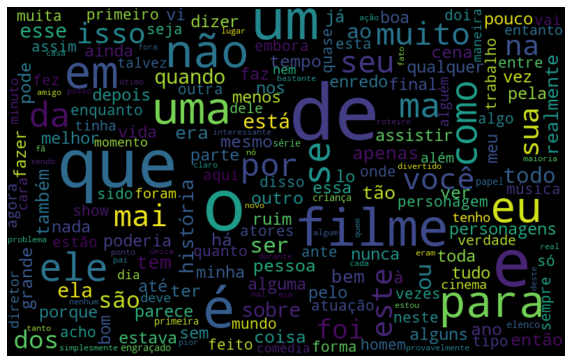

In [28]:
plt.figure(figsize=(10,7))
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [29]:
dataset.query("sentiment == 'pos'")

,id,text_en,text_pt,sentiment,classif
12389,12391,I went and saw this movie last night after bei...,Eu fui e vi este filme ontem à noite depois de...,pos,1
12390,12392,Actor turned director Bill Paxton follows up h...,"O diretor do ator, Bill Paxton, segue sua prom...",pos,1
12391,12393,As a recreational golfer with some knowledge o...,Como um jogador de recreio com algum conhecime...,pos,1
12392,12394,"I saw this film in a sneak preview, and it is ...","Eu vi esse filme em uma prévia, e é delicioso....",pos,1
12393,12395,Bill Paxton has taken the true story of the 19...,Bill Paxton levou a verdadeira história do gol...,pos,1
...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1


In [30]:
def genWordCloud(dataframe, textColumn):
  allWords = ' '.join([text for text in dataframe[textColumn]])

  wordCloud = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(allWords)

  plt.figure(figsize=(10,7))
  plt.imshow(wordCloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

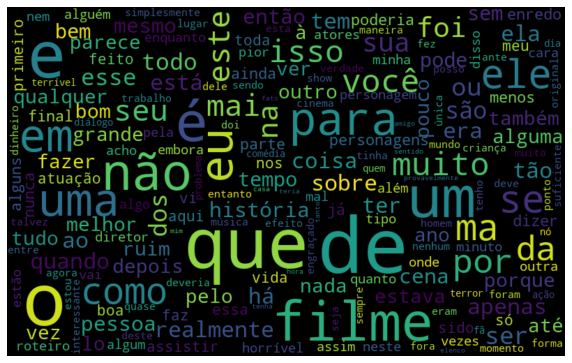

In [31]:
genWordCloud(dataset.query("sentiment == 'neg'"), 'text_pt')

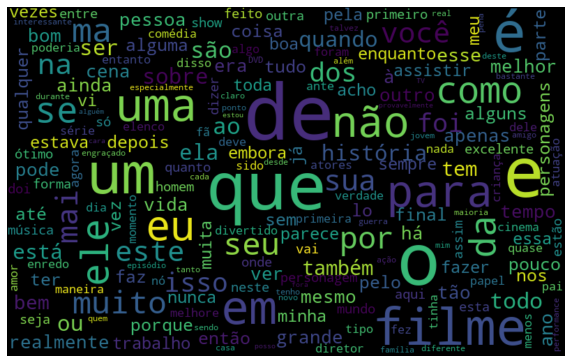

In [32]:
genWordCloud(dataset.query("sentiment == 'pos'"), 'text_pt')

# Tokenização e a bliblioteca NLTK

In [33]:
import nltk

In [34]:
textExample = ['um filme ruim', 'um filme bom']

frequency = nltk.FreqDist(textExample)

frequency

FreqDist({'um filme ruim': 1, 'um filme bom': 1})

In [35]:
from nltk import tokenize

In [36]:
textExample = 'Bem-vindo ao mundo do PLN'

spaceToken = tokenize.WhitespaceTokenizer()

textToken = spaceToken.tokenize(textExample)

textToken

['Bem-vindo', 'ao', 'mundo', 'do', 'PLN']

In [37]:
frequency = nltk.FreqDist(textToken)

frequency

FreqDist({'Bem-vindo': 1, 'ao': 1, 'mundo': 1, 'do': 1, 'PLN': 1})

In [38]:
allWordsToken = tokenize.WhitespaceTokenizer().tokenize(allWords)

frequency = nltk.FreqDist(allWordsToken)

frequency

FreqDist({'de': 417651, 'que': 325070, 'e': 299743, 'o': 244881, 'um': 216410, 'a': 210179, 'é': 192381, 'em': 132778, 'uma': 130888, 'não': 127915, ...})

In [39]:
dfWordsFrequecy = pd.DataFrame({ 'word': list(frequency.keys()), 'freq': list(frequency.values()) })

dfMostWordsFrequecy = dfWordsFrequecy.nlargest(columns='freq', n=10)

dfMostWordsFrequecy

,word,freq
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


# Uma nova visualização e os stop words

In [40]:
import seaborn as sns

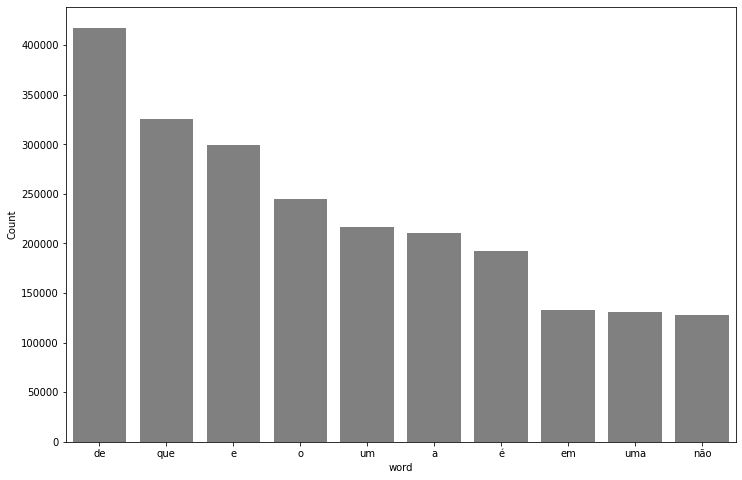

In [41]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data=dfMostWordsFrequecy, x='word', y='freq', color='gray')
ax.set(ylabel='Count')
plt.show()

In [42]:
def pareto(dataframe, textColumn, n):

  allWords = ' '.join([text for text in dataframe[textColumn]])
  allWordsToken = tokenize.WhitespaceTokenizer().tokenize(allWords)
  frequency = nltk.FreqDist(allWordsToken)
  
  dfWordsFrequecy = pd.DataFrame({ 'word': list(frequency.keys()), 'freq': list(frequency.values()) })
  dfMostWordsFrequecy = dfWordsFrequecy.nlargest(columns='freq', n=n)

  plt.figure(figsize=(12,8))
  ax = sns.barplot(data=dfMostWordsFrequecy, x='word', y='freq', color='gray')
  ax.set(ylabel='Count')
  plt.show()

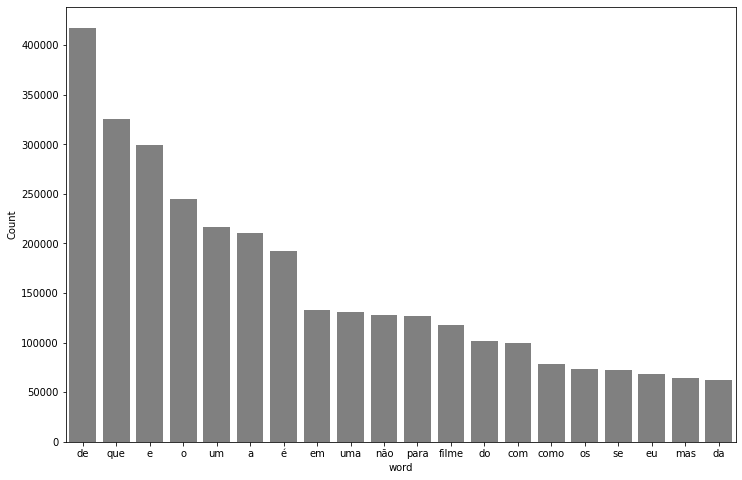

In [43]:
pareto(dataset, 'text_pt', 20)

In [52]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [53]:
stopWords = nltk.corpus.stopwords.words('portuguese')

stopWords

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'às',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'é',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'éramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'está',
 'estamos',
 'estão',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estávamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estivéramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéssemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'fôramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fôssemos',
 'fui',
 'há',
 'haja',
 'hajam',
 'hajamos',
 'hão',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houverá',
 'houveram',
 'houvéramos',
 'houverão',
 'houverei',
 'houverem',
 'hou

In [58]:
processPhrase = list();

for text in dataset.text_pt:
  newPhrase = list()
  textWords = tokenize.WhitespaceTokenizer().tokenize(text)

  for word in textWords:
    if word not in stopWords:
      newPhrase.append(word)

  processPhrase.append(' '.join(newPhrase))

In [59]:
dataset['first_step'] = processPhrase

In [61]:
dataset.head()

,id,text_en,text_pt,sentiment,classif,first_step
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


In [62]:
classifText(dataset, 'first_step', 'classif')

0.6811160533764659

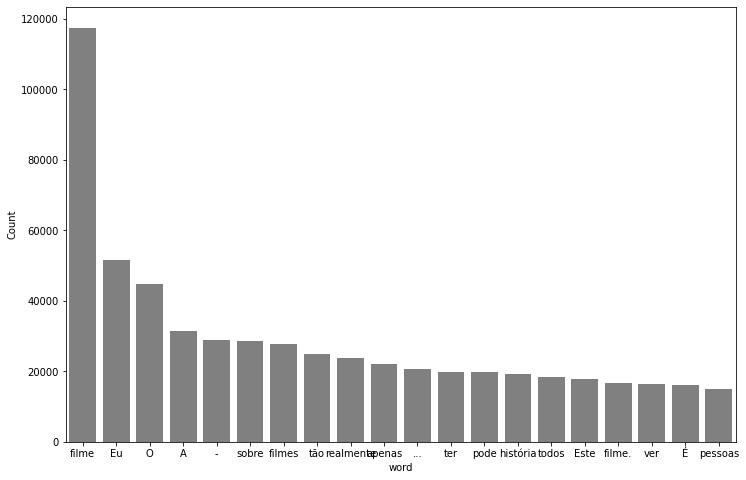

In [63]:
pareto(dataset, 'first_step', 20)